<a href="https://colab.research.google.com/github/gatienseven7/Data_sets/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ("hello")

hello


In [20]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 1000_questions.csv to 1000_questions.csv
User uploaded file "1000_questions.csv" with length 166982 bytes


Nous avons exécuté la requête suivante  

SELECT
  TagName,
  Count
FROM Tags
ORDER BY Count DESC;

pour pouvoir avoir la liste des sujets les plus abordés.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tags_name.csv")
df.head()

,TagName,Count
0,machine-learning,11394
1,python,6629
2,deep-learning,4842
3,neural-network,4349
4,classification,3252


On vérifie si le dataFrame contient des données nulles ou manquantes

In [14]:
#df.isnull().sum()
df.isna().sum()

,0
TagName,0
Count,0


In [18]:
top_tags = df.sort_values(by=['Count'], ascending=False).head(20)

Un graphe pour mieux visualiser les 20 sujets les plus utilisés

<ipython-input-19-6b6268d2d5dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y = 'TagName', data= top_tags, palette = "viridis")


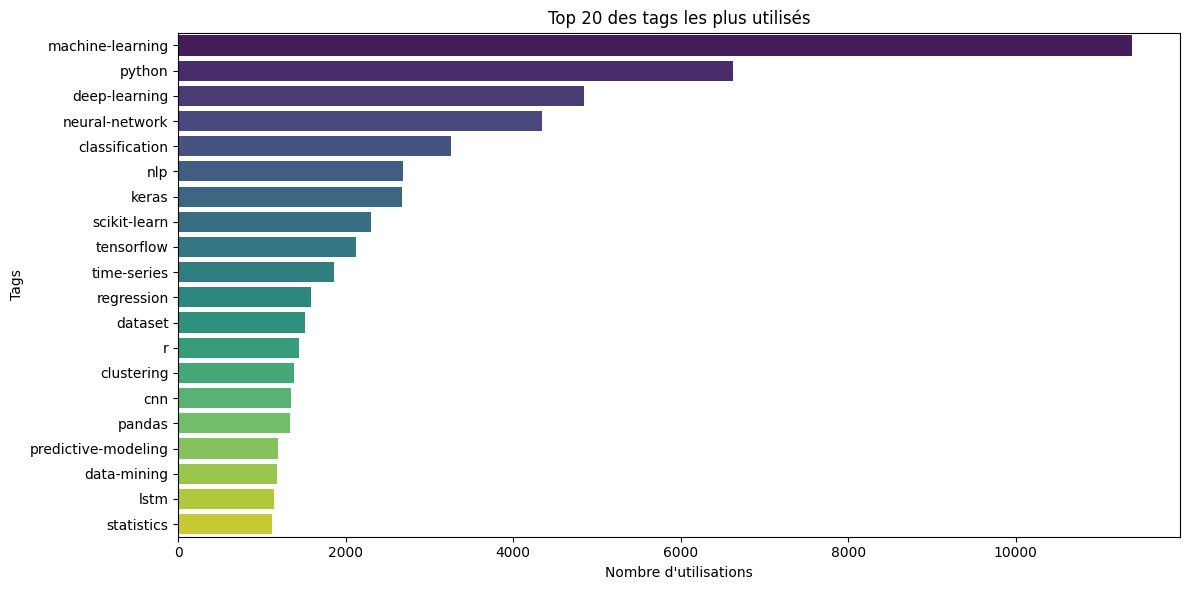

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y = 'TagName', data= top_tags, palette = "viridis")
plt.title("Top 20 des tags les plus utilisés")
plt.xlabel("Nombre d'utilisations")
plt.ylabel("Tags")
plt.tight_layout()
plt.show()

Une nouvelles requête pour les 1000 questions les plus populaires sur le site

SELECT TOP 1000
  P.Id AS QuestionId,
  P.Title,
  P.CreationDate,
  P.ViewCount,
  P.Score,
  P.AnswerCount,
  P.Tags,
  U.DisplayName AS Author,
  U.Reputation AS AuthorReputation
FROM Posts P
LEFT JOIN Users U ON P.OwnerUserId = U.Id
WHERE P.PostTypeId = 1  -- 1 = Question
  AND P.ViewCount > 0
ORDER BY P.ViewCount DESC;

In [73]:
df2 = pd.read_csv("1000_questions.csv")
df2.head()

,QuestionId,Title,CreationDate,ViewCount,Score,AnswerCount,Tags,Author,AuthorReputation
0,20199,train_test_split() error: Found input variable...,2017-07-06 05:17:55,530904,56,2,<python><scikit-learn><sampling>,josh_gray,663.0
1,15135,Train/Test/Validation Set Splitting in Sklearn,2016-11-15 14:55:04,447278,205,18,<machine-learning><scikit-learn><cross-validat...,Hendrik,8737.0
2,11928,"ValueError: Input contains NaN, infinity or a ...",2016-05-26 04:13:04,446704,96,10,<python><scikit-learn><pandas><random-forest><...,Edamame,2775.0
3,13490,How to set class weights for imbalanced classe...,2016-08-17 09:35:45,443697,266,10,<deep-learning><classification><keras><weighte...,Hendrik,8737.0
4,33053,How do I compare columns in different data fra...,2018-06-12 22:34:00,421292,55,9,<pandas><dataframe>,a_a_a,837.0


On analyse et on nettoie le fichier

In [41]:
df2.isna().sum()

#On constate que les colonnes Author et AuthorReputation ont 9 éléments nuls chacunes

,0
QuestionId,0
Title,0
CreationDate,0
ViewCount,0
Score,0
AnswerCount,0
Tags,0
Author,9
AuthorReputation,9


In [30]:
df2['Author'].info()
#Connaître le type de la colonne autheur ou avoir des infos sur la colonne

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Author
Non-Null Count  Dtype 
--------------  ----- 
991 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [31]:
df2['AuthorReputation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: AuthorReputation
Non-Null Count  Dtype  
--------------  -----  
991 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [42]:
#Remplir les valeurs manquantes

df2['Author'].fillna('Inconnu', inplace=True)
df2['AuthorReputation'].fillna(0, inplace=True)

<ipython-input-42-f8e7ec15e12a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Author'].fillna('Inconnu', inplace=True)
<ipython-input-42-f8e7ec15e12a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [35]:
df2[df2['Author'] == 'Inconnu'].head()
#Histoire de vérifier si les colonnes manquantes ont bel et bien été remplacées par Inconnu

,QuestionId,Title,CreationDate,ViewCount,Score,AnswerCount,Tags,Author,AuthorReputation
141,12318,How to interpret the output of XGBoost importa...,2016-06-21 06:02:19,71634,58,2,<machine-learning><xgboost>,Inconnu,0.0
150,64441,How to interpret classification report of scik...,2019-12-08 23:17:19,69190,30,2,<classification><metric><binary>,Inconnu,0.0
203,64260,Pearson vs Spearman vs Kendall,2019-12-05 11:33:17,56067,42,1,<correlation><pearsons-correlation-coefficient...,Inconnu,0.0
350,34416,scikit-learn n_jobs parameter on CPU usage & m...,2018-07-13 10:06:59,37268,19,1,<python><scikit-learn>,Inconnu,0.0
450,26938,What exactly is bootstrapping in reinforcement...,2018-01-22 23:18:32,30240,48,2,<reinforcement-learning>,Inconnu,0.0


Il nous faut à présent voir la correlation entre les sujets traités et les réponses apportées aux sujets, afin de savoir si plus un sujet est taité, plus il a des réponses

 
 correlation : -0.037


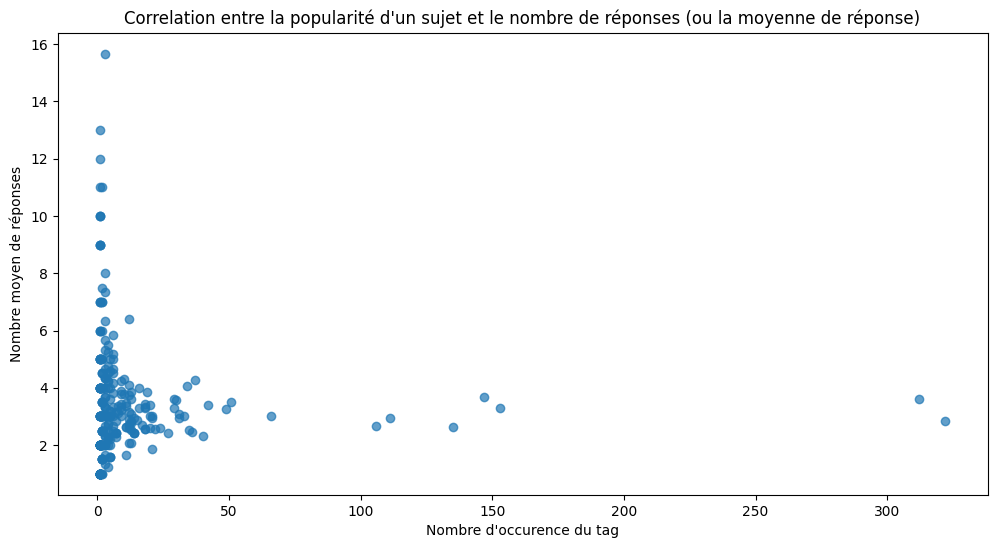

In [74]:
df2['Tags'] = df2['Tags'].fillna('')
df2['Tags'] = df2['Tags'].str.findall(r'<(.*?)>')  #Pour extraire une liste tags

df_tags = df2.explode('Tags')

#Compter le nombre d'occurence entre tags

tag_counts = df_tags['Tags'].value_counts().rename('Count')

#Moyenne des réponses pour chaque tag

mean_answers = df_tags.groupby('Tags')['AnswerCount'].mean().rename('MeanAnswersCount')

#Fusion des deux infos

tag_stats = pd.concat([tag_counts, mean_answers], axis=1)

#On calcule la correlation

correlation = tag_stats['Count'].corr(tag_stats['MeanAnswersCount'])
print(f" \n correlation : {correlation : .3f}")

# Nuage de points pour bien visionner les données

plt.figure(figsize=(12,6))
plt.scatter(tag_stats['Count'], tag_stats['MeanAnswersCount'], alpha = 0.7)
plt.title("Correlation entre la popularité d'un sujet et le nombre de réponses (ou la moyenne de réponse)")
plt.xlabel("Nombre d'occurence du tag")
plt.ylabel("Nombre moyen de réponses")
plt.show()




In [57]:
# La correlation est négative, ce qui veut dire que les sujets les plus populaires n'ont pas plus de réponses !
#Il n'y a pas de rapport entre eux

Variance de Count : nan
Variance de MeanAnswersCount : nan


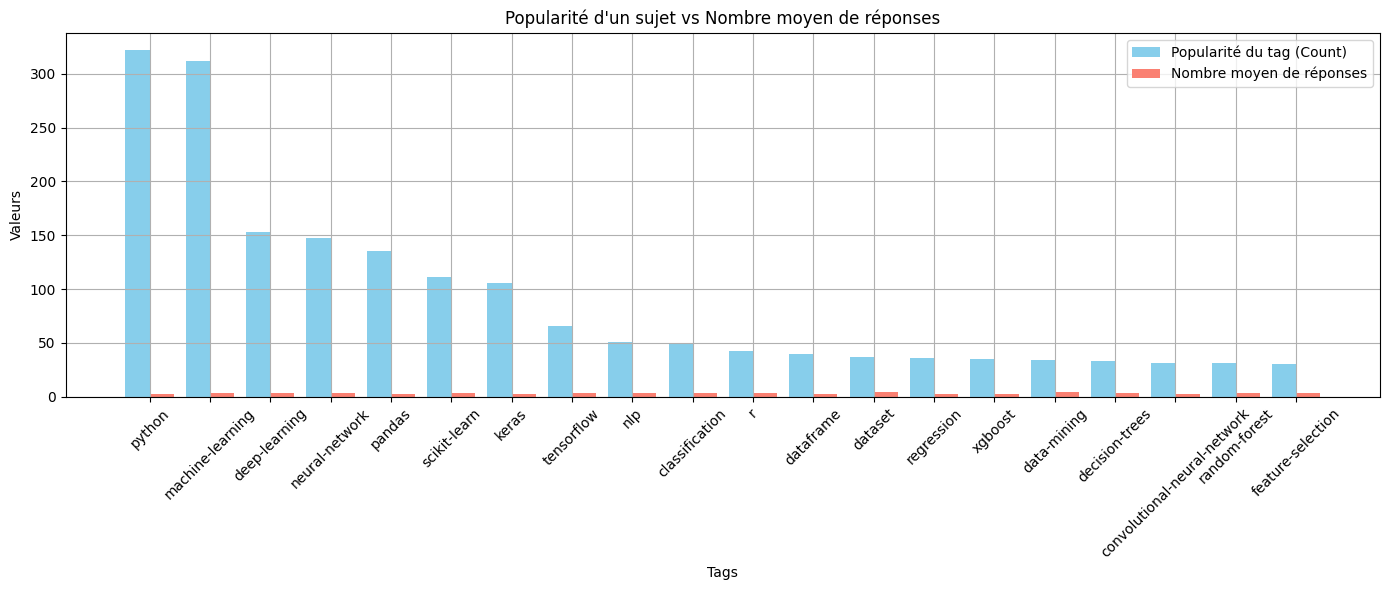

In [80]:
# On sélectionne les 20 tags les plus fréquents pour garder le graphique lisible
top_tags = tag_stats.sort_values(by="Count", ascending=False).head(20)

# Largeur des barres
bar_width = 0.4
x = np.arange(len(top_tags))

# Création du graphique
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width/2, top_tags['Count'], width=bar_width, label="Popularité du tag (Count)", color='skyblue')
plt.bar(x + bar_width/2, top_tags['MeanAnswersCount'], width=bar_width, label="Nombre moyen de réponses", color='salmon')

# Personnalisation
plt.xticks(x, top_tags.index, rotation=45)
plt.xlabel("Tags")
plt.ylabel("Valeurs")
plt.title("Popularité d'un sujet vs Nombre moyen de réponses")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()